## FRIENDS Data Analysis

____
** Import numpy and pandas **

In [7]:
import pandas as pd
import numpy as np

** Import visualization libraries and set %matplotlib inline. **

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [22]:

df = pd.read_csv('../dataset/friends_dataset_allseasons.csv',sep='\t')
df['Location'] = df['Location'].replace('the hallway', 'The Hallway')


** Check the info() of the df **

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61517 entries, 0 to 61516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Season        61517 non-null  int64 
 1   Episode       61517 non-null  object
 2   Episode Name  61517 non-null  object
 3   Location      61010 non-null  object
 4   Character     61517 non-null  object
 5   Dialogue      61517 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


** Check the head of df **

In [24]:
df.head(5)

,Season,Episode,Episode Name,Location,Character,Dialogue
0,1,01,The One Where Monica Gets a New Roommate (The ...,Central Perk,Monica,There's nothing to tell! He's just some guy I ...
1,1,01,The One Where Monica Gets a New Roommate (The ...,Central Perk,Joey,"C'mon, you're going out with the guy! There's ..."
2,1,01,The One Where Monica Gets a New Roommate (The ...,Central Perk,Chandler,"All right Joey, be nice. So does he have a hu..."
3,1,01,The One Where Monica Gets a New Roommate (The ...,Central Perk,Phoebe,"Wait, does he eat chalk"
4,1,01,The One Where Monica Gets a New Roommate (The ...,Central Perk,Phoebe,"Just, 'cause, I don't want her to go through w..."


## Basic Questions

** What are the top 6 Lead Charactes? **

In [69]:
df['Character'].value_counts().head(6)

Rachel      9294
Ross        9175
Chandler    8454
Monica      8437
Joey        8198
Phoebe      7531
Name: Character, dtype: int64

** What are the top 5 supporting characters? **


In [33]:
#Ignoring Character == 'All'
df_new = df[df['Character'] != 'All']
df_new['Character'].value_counts().head(12).tail(6)

Mike          360
Richard       254
Mr. Geller    231
Janice        219
Carol         205
Charlie       190
Name: Character, dtype: int64

** What are the top 5 set(Location)? **

In [35]:
df['Location'].value_counts().head(6)

Monica's Apartment               18561
Central Perk                     10896
Chandler and Joey's Apartment     7188
Ross's Apartment                  1228
The Hallway                        692
Ross and Rachel's Apartment        599
Name: Location, dtype: int64

# Total number of lines by each lead characters

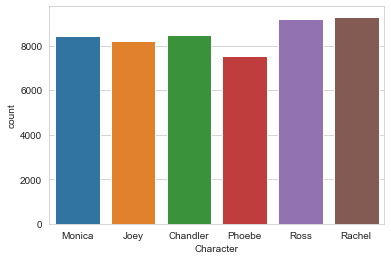

In [75]:
df_leadcharacters=df[(df['Character'] == 'Chandler') | (df['Character'] == 'Ross') | (df['Character'] == 'Joey')  |(df['Character'] == 'Monica') | (df['Character'] == 'Rachel') | (df['Character'] == 'Phoebe')      ]
sns.countplot(x='Character',data=df_leadcharacters)

Findings: Ross and Rachel had more lines(Dialogues) than anyone else.
          Rachel and Ross both had 9k+ lines. This was really close. While Phoebe had the least number of lines, 7.5k. 

# Total number of lines by supporting characters

** Now use seaborn to create a countplot Friends by Supporting Characters. **
Mike          360
Richard       254
Mr. Geller    231
Janice        219
Carol         205
Charlie       190

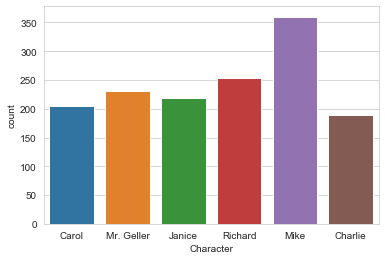

In [34]:
df_supporingcharacters=df[(df['Character'] == 'Mike') | (df['Character'] == 'Richard') | (df['Character'] == 'Mr. Geller')  |(df['Character'] == 'Janice') | (df['Character'] == 'Carol') | (df['Character'] == 'Charlie')      ]
sns.countplot(x='Character',data=df_supporingcharacters)

In [ ]:
Findings: Despite 'Gunther' appeared in most number of sean. Interestingly Mike and Richard had the most number of Lines (Dialogue).

# The Main Set (Location)

** Now use seaborn to create a countplot Friends by Location. **
Monica's Apartment               18561
Central Perk                     10896
Chandler and Joey's Apartment     7188
Ross's Apartment                  1228
The Hallway                        692
Ross and Rachel's Apartment        599

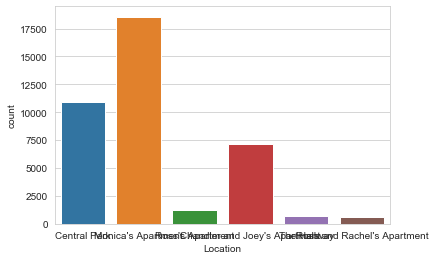

In [73]:
df_locations=df[(df['Location'] == "Monica's Apartment") | (df['Location'] == "Central Perk") | (df['Location'] == "Chandler and Joey's Apartment")  |(df['Location'] == "Ross's Apartment") | (df['Location'] == 'The Hallway') | (df['Location'] == "Ross and Rachel's Apartment")  ]
sns.countplot(x='Location',data=df_locations)

Findings: The main set for Friends was Monica's Apartment then 'Central Perk'

# Total Number of Lines by each lead characters at Central Perk

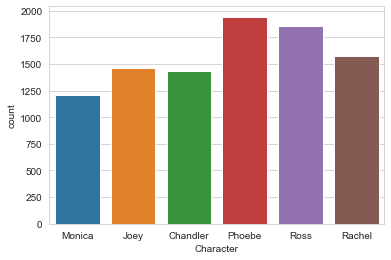

In [72]:
df_linesat_centralperkt=df[((df['Character'] == 'Chandler') | (df['Character'] == 'Ross') | (df['Character'] == 'Joey')  |(df['Character'] == 'Monica') | (df['Character'] == 'Rachel') | (df['Character'] == 'Phoebe')) & (df['Location'] == "Central Perk")]
sns.countplot(x='Character',data=df_linesat_centralperkt)

In [ ]:
Findings: Phoebe had the most number of lines in 'Central Perk' followed by Ross and then Rachel.

# Total Number of Lines by each lead characters at Monica's Apartment


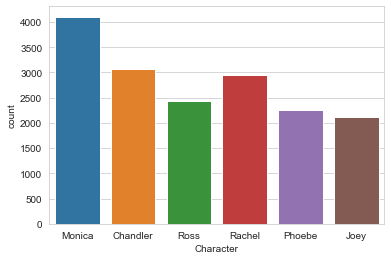

In [71]:
df_linesat_monicaspartment=df[((df['Character'] == 'Chandler') | (df['Character'] == 'Ross') | (df['Character'] == 'Joey')  |(df['Character'] == 'Monica') | (df['Character'] == 'Rachel') | (df['Character'] == 'Phoebe')) & (df['Location'] == "Monica's Apartment")]
sns.countplot(x='Character',data=df_linesat_monicaspartment)

In [ ]:
Findings: Of course, no surprises here. Monica had the most number of lines in her apartment followed by Chandler and then Rachel.

# Total number of lines by each lead characters in each season

** Now use seaborn to create a countplot of the Season column with the hue based off of the Character column. **

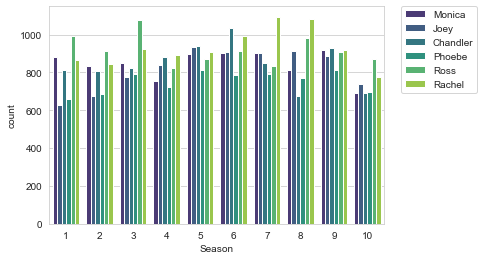

In [37]:
sns.countplot(x='Season',data=df_leadcharacters,hue='Character',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total number of lines by each lead characters in each set

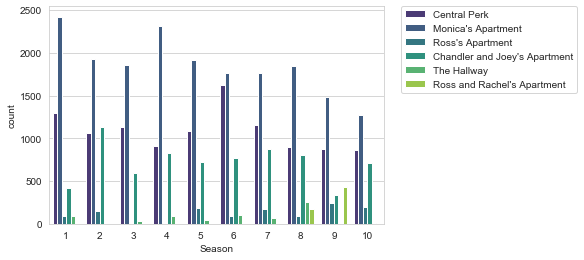

In [39]:
sns.countplot(x='Season',data=df_locations,hue='Location',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Now create a gropuby object called bySeason, where you group the DataFrame by the Seasib column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [43]:
bySeason = df.groupby('Season').count()
bySeason.head(10)

,Episode,Episode Name,Location,Character,Dialogue
Season,,,,,
1,5994,5994,5985,5994,5994
2,6024,6024,5574,6024,6024
3,6499,6499,6498,6499,6499
4,5996,5996,5988,5996,5996
5,6225,6225,6225,6225,6225
6,6460,6460,6443,6460,6460
7,6299,6299,6287,6299,6299
8,6226,6226,6225,6226,6226
9,6498,6498,6489,6498,6498


# creating a simple plot off of the dataframe indicating the no. of lines(Dialogue) per season. 

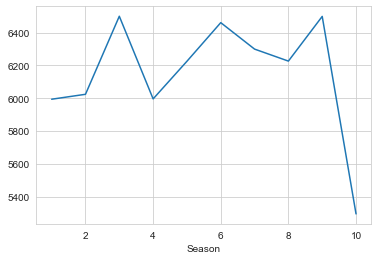

In [42]:
# Could be any column
bySeason['Dialogue'].plot()


# Now see if we can use seaborn's lmplot() to create a linear fit on the number of lines per season. 

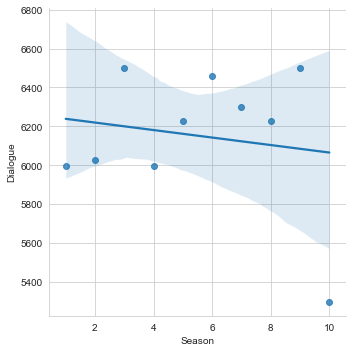

In [77]:
#need to reset the index to a column. 
sns.lmplot(x='Season',y='Dialogue',data=bySeason.reset_index())

# heatmap

In [49]:
df['Episode'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '23-24', '17-18'], dtype=object)

In [52]:
df['Episode'] = df['Episode'].replace('23-24', '23')
df['Episode'] = df['Episode'].replace('17-18', '17')

In [63]:
SeasonEpisode = df.groupby(by=['Season','Episode']).count()['Dialogue'].unstack().fillna(0)
SeasonEpisode.head(10)

Episode,01,02,03,04,05,06,07,08,09,10,...,16,17,18,19,20,21,22,23,24,25
Season,,,,,,,,,,,,,,,,,,,,,
1,300.0,243.0,258.0,252.0,238.0,220.0,231.0,234.0,227.0,233.0,...,271.0,282.0,276.0,244.0,244.0,211.0,277.0,268.0,258.0,0.0
2,218.0,203.0,198.0,214.0,278.0,226.0,209.0,213.0,242.0,296.0,...,272.0,235.0,247.0,265.0,287.0,289.0,227.0,247.0,201.0,0.0
3,241.0,285.0,233.0,236.0,278.0,248.0,238.0,236.0,289.0,219.0,...,283.0,294.0,241.0,237.0,271.0,332.0,275.0,252.0,247.0,288.0
4,219.0,226.0,239.0,239.0,237.0,248.0,237.0,269.0,261.0,223.0,...,256.0,256.0,251.0,273.0,258.0,250.0,255.0,261.0,228.0,0.0
5,261.0,244.0,252.0,217.0,255.0,229.0,269.0,247.0,238.0,261.0,...,266.0,223.0,280.0,302.0,256.0,311.0,336.0,273.0,250.0,0.0
6,252.0,242.0,246.0,245.0,240.0,255.0,245.0,251.0,253.0,230.0,...,269.0,230.0,278.0,312.0,239.0,280.0,257.0,259.0,304.0,246.0
7,263.0,227.0,260.0,270.0,283.0,251.0,257.0,255.0,255.0,250.0,...,359.0,281.0,219.0,256.0,259.0,256.0,271.0,253.0,257.0,0.0
8,280.0,271.0,276.0,268.0,300.0,295.0,268.0,260.0,271.0,275.0,...,225.0,223.0,235.0,238.0,292.0,266.0,233.0,309.0,217.0,0.0
9,286.0,257.0,272.0,201.0,252.0,317.0,219.0,281.0,274.0,282.0,...,246.0,259.0,289.0,267.0,296.0,278.0,302.0,596.0,0.0,0.0


** Now create a HeatMap using this new DataFrame. **

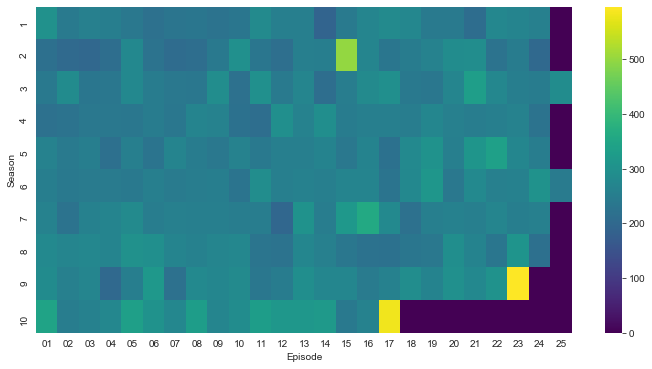

In [64]:
plt.figure(figsize=(12,6))
sns.heatmap(SeasonEpisode,cmap='viridis')

** Now create a clustermap using this DataFrame. **

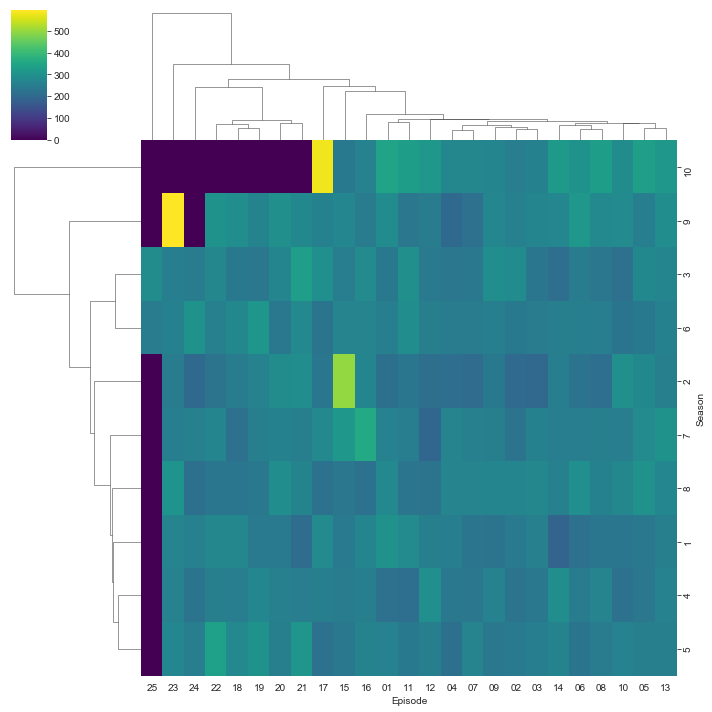

In [65]:
sns.clustermap(SeasonEpisode,cmap='viridis')